# Import all libraries

In [1]:
import tensorflow as tf #building and training neural networks
import cv2 #opencv-image processing
import os 
import matplotlib.pyplot as plt #used for plotting graphs
import numpy as np #used for large dimensional array

C:\Users\ashok\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading all the images in the dataset

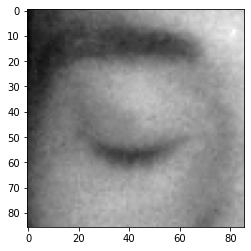

In [2]:
Datadirectory = "Train_Dataset/"
Classes = ["Closed", "Open"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        #reads the image in grayscale using opencv
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
        #converts grayscale to RGB format
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

# Resizing the Image

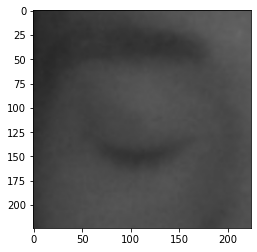

In [3]:
#Resize all the images into 224 x 224 for better feature extraction.

img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

# Creating dataset

In [4]:
#it's a empty list that will be used to store pairs of image data and corresponding labels
training_Data =[]

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ##0 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_Data()
            

In [5]:
# Random Shuffling to avoid Overfitting 

import random
random.shuffle(training_Data)

In [6]:
# Create array to store features and labels

X=[] #store images
y=[] #store labels

for features, label in training_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1, img_size, img_size, 3)


In [7]:
#normalize the data
#pixel values reduced
X=X/255.0;


In [8]:
Y=np.array(y)

In [9]:
#both are libraries used for saving and loading objects
import joblib
import pickle

joblib.dump(X, "X.pickle") #saving in file
joblib.dump(Y, "Y.pickle")

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
model = tf.keras.applications.mobilenet.MobileNet()

#MobileNet is a lightweight convolutional neural network (CNN) architecture
#designed for mobile and embedded vision applications. It is known for its
#efficiency and relatively low computational requirements while maintaining
#good performance in image classification tasks.

In [12]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

# Transfer Learning

In [13]:
#select input
base_input = model.layers[0].input

In [14]:
base_output = model.layers[-4].output #output of dropout layer

In [15]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ##one node(1/0)
final_output = layers.Activation('sigmoid')(final_output)

In [16]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [17]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

# Settings for Binary Classification (Open-1/ Closed-0)

In [18]:
new_model.compile(loss="binary_crossentropy", optimizer ="adam", metrics =["accuracy"])

In [19]:
new_model.fit(X, Y, epochs = 5, validation_split = 0.2) ##training 

Epoch 1/5
100/100 [==============================] - 463s 4s/step - loss: 0.0219 - accuracy: 0.9922 - val_loss: 0.5220 - val_accuracy: 0.9375
Epoch 2/5
100/100 [==============================] - 402s 4s/step - loss: 1.2354e-04 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9975
Epoch 3/5
100/100 [==============================] - 431s 4s/step - loss: 2.1670e-05 - accuracy: 1.0000 - val_loss: 8.3569e-07 - val_accuracy: 1.0000
Epoch 4/5
100/100 [==============================] - 488s 5s/step - loss: 4.6949e-06 - accuracy: 1.0000 - val_loss: 3.2569e-07 - val_accuracy: 1.0000
Epoch 5/5
100/100 [==============================] - 1156s 12s/step - loss: 8.8174e-06 - accuracy: 1.0000 - val_loss: 2.8398e-07 - val_accuracy: 1.0000


In [19]:
new_model.save('my_model_new.keras')

In [20]:
# new_model = tf.keras.models.load_model('train.h5')

In [21]:
new_model_2 = tf.keras.models.load_model('cnnCat2.h5')

In [22]:
img_array = cv2.imread('_6.jpg', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

1/1 [==============================] - 1s 1s/step


array([[0.5379264]], dtype=float32)

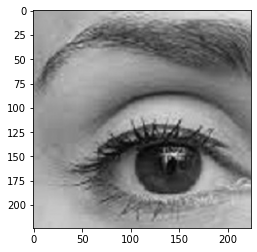

In [23]:
plt.imshow(new_array)
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
X_input = X_input/255.0 #normalizing data
prediction = new_model.predict(X_input)
prediction

In [24]:
img_array = cv2.imread('_2.jpg', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

1/1 [==============================] - 0s 54ms/step


array([[0.4598379]], dtype=float32)

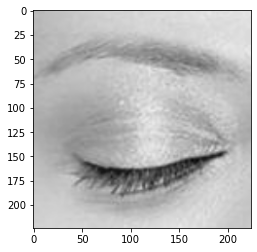

In [25]:
plt.imshow(new_array)
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
X_input = X_input/255.0 #normalizing data
prediction = new_model.predict(X_input)
prediction

# Check for Unknown Image

In [26]:
img = cv2.imread('sad.png')

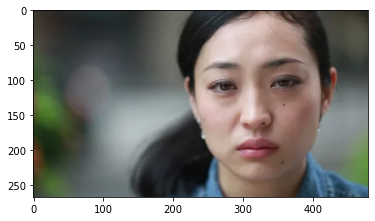

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [28]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

In [30]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

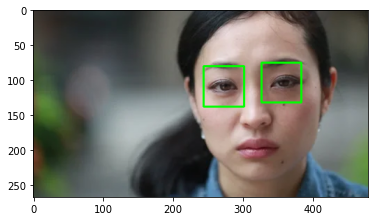

In [31]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Cropping the Eye Image

In [32]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#print(faceCascade.empty())

eyes =  eye_cascade.detectMultiScale(gray, 1.1, 4)

for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    
    if len(eyess) == 0:
        print("Eyes aren't detected")
        
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

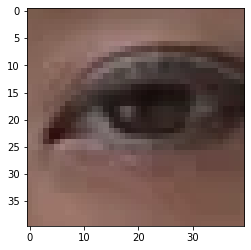

In [33]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [34]:
eyes_roi.shape

(40, 40, 3)

In [35]:
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [36]:
final_image.shape

(1, 224, 224, 3)

In [37]:
new_model.predict(final_image)

1/1 [==============================] - 0s 60ms/step


array([[0.51487386]], dtype=float32)

# Realtime Video Demo

In [ ]:
import winsound
import numpy as np
import cv2

frequency = 2500  # Set frequency to 2500
duration = 3000  # Set duration to 1500 ms == 3.0 sec

# Load Haar cascades for face and eyes
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Open the webcam
cap = cv2.VideoCapture(1)

# Check if the webcam is opened correctly, if not, try another camera
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

cap.set(cv2.CAP_PROP_FPS, 5)
counter = 0

while True:
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect eyes
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    num_eyes = len(eyes)

    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Detect faces
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Resize and preprocess the eyes_roi
    if num_eyes > 0:
        status = "Open Eyes"
        cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    else:
        counter += 1
        status = "Closed Eyes"
        cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Beep and display a warning after eyes are closed for a certain duration
        if counter > 10:
            cv2.putText(frame, "Warning: Eyes Closed!", (50, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            winsound.Beep(frequency, duration)
            counter = 0

    # Display the frame
    cv2.imshow("Drowsiness Detection", frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


In [ ]:
# import winsound
# frequency = 2500  # Set frequency to 2500
# duration = 1500  # Set duration to 1500 ms == 1.5 sec
# import numpy as np
# import cv2
# path = "haarcascade_frontalface_default.xml"
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# cap = cv2.VideoCapture(1)
# #check if webcam is opened correctly
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FPS, 5)
# counter = 0
# while True:
#     ret,frame = cap.read()
#     eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
#     for x,y,w,h in eyes:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)
#         eyess = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess) == 0:
#             print("Eyes are not detected")
#         else:
#             for (ex, ey, ew, eh) in eyess:
#                 eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     if(faceCascade.empty()==False):
#         print("detected")
#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)
#     # Draw a rectangle around eyes
#     for (x,y,w,h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     final_image = cv2.resize(eyes_roi, (224,224))
#     final_image = np.expand_dims(final_image, axis=0)
#     final_image = final_image/255.0
#     Predictions = new_model.predict(final_image)
#     if (Predictions>=0.3):
#         status = "Open Eyes"
#         cv2.putText(frame,
#                 status,
#                 (150,150),
#                 font, 3,
#                 (0, 255, 0),
#                 2,
#                 cv2.LINE_4)
#         x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0,0,0), -1)
#         #Add text
#         cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
#     elif Predictions<0.3:
#         counter = counter + 1
#         status = "Closed Eyes"
#         cv2.putText(frame,
#                 status,
#                 (150,150),
#                 font, 3,
#                 (0, 0, 255),
#                 2,
#                 cv2.LINE_4)
#         x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame, (x1,y1), (x1 + w1, y1 + h1), (0,0,255), 2)
#         if counter > 10:
#             x1,y1,w1,h1 = 0,0,175,75
#             #Draw black background rectangle
#             cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0,0,0), -1)
#             #Add text
#             cv2.putText(frame, "Don't fall asleep while driving!!", (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
#             winsound.Beep(frequency, duration)
#             counter = 0
#     cv2.imshow("Drowsiness Detection", frame)
#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# LATEST




#import winsound
# frequency = 2500  # Set frequency to 2500
# duration = 1500  # Set duration to 1500 ms == 1.5 sec
# import numpy as np
# import cv2
# path = "haarcascade_frontalface_default.xml"
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# cap = cv2.VideoCapture(1)
# #check if webcam is opened correctly
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FPS, 5)
# counter = 0
# while True:
#     ret,frame = cap.read()
#     eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
#     for x,y,w,h in eyes:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)
#         eyess = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess) == 0:
#             print("Eyes are not detected")
#         else:
#             for (ex, ey, ew, eh) in eyess:
#                 eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     if(faceCascade.empty()==False):
#         print("detected")
#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)
#     # Draw a rectangle around eyes
#     for (x,y,w,h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     final_image = cv2.resize(eyes_roi, (224,224))
#     final_image = np.expand_dims(final_image, axis=0)
#     final_image = final_image/255.0
#     Predictions = new_model.predict(final_image)
#     if (Predictions>=0.5):
#         status = "Open Eyes"
#         cv2.putText(frame,
#                 status,
#                 (150,150),
#                 font, 3,
#                 (0, 255, 0),
#                 2,
#                 cv2.LINE_4)
#         x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0,0,0), -1)
#         #Add text
#         cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
#     elif Predictions<0.5:
#         counter = counter + 1
#         status = "Closed Eyes"
#         cv2.putText(frame,
#                 status,
#                 (150,150),
#                 font, 3,
#                 (0, 0, 255),
#                 2,
#                 cv2.LINE_4)
#         x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame, (x1,y1), (x1 + w1, y1 + h1), (0,0,255), 2)
#         if counter > 10:
#             x1,y1,w1,h1 = 0,0,175,75
#             #Draw black background rectangle
#             cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0,0,0), -1)
#             #Add text
#             cv2.putText(frame, "Sleep Alert !!!", (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
#             winsound.Beep(frequency, duration)
#             counter = 0
#     cv2.imshow("Drowsiness Detection", frame)
#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# import numpy as np
# import cv2
# import winsound

# # Load the pre-trained face and eye cascade classifiers
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# # Load the pre-trained model for eye state prediction
# new_model = tf.keras.models.load_model('my_model_new.keras')

# # Initialize the counter for closed eyes
# counter = 0

# # Set the frequency and duration for the winsound alert
# frequency = 2500  # Set frequency to 2500
# duration = 1500  # Set duration to 1500 ms == 1.5 sec

# # Initialize the webcam
# cap = cv2.VideoCapture(1)  # Change the index to 0 if your default camera is not working

# # Check if the webcam is opened correctly
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)

# cap.set(cv2.CAP_PROP_FPS, 5)

# while True:
#     ret, frame = cap.read()

#     # Convert the frame to grayscale for face and eye detection
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Detect faces in the frame
#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)

#     for (x, y, w, h) in faces:
#         # Extract the region of interest (ROI) for face
#         roi_gray = gray[y:y + h, x:x + w]
#         roi_color = frame[y:y + h, x:x + w]

#         # Detect eyes in the face ROI
#         eyes = eye_cascade.detectMultiScale(roi_gray)

#         for (ex, ey, ew, eh) in eyes:
#             eyes_roi = roi_color[ey: ey + eh, ex: ex + ew]

#             # Resize the eyes ROI for model input
#             final_image = cv2.resize(eyes_roi, (224, 224))
#             final_image = np.expand_dims(final_image, axis=0)
#             final_image = final_image / 255.0

#             # Predict the eye state using the model
#             prediction = new_model.predict(final_image)

#             # Threshold for closed eyes prediction
#             if prediction < 0.3:
#                 counter += 1
#                 status = "Closed Eyes"

#                 # Show the status on the frame
#                 cv2.putText(frame,
#                             status,
#                             (150, 150),
#                             cv2.FONT_HERSHEY_SIMPLEX, 3,
#                             (0, 0, 255),
#                             2,
#                             cv2.LINE_4)

#                 # Check if eyes are closed for a certain number of frames before triggering the alert
#                 if counter > 10:
#                     x1, y1, w1, h1 = 0, 0, 175, 75
#                     # Draw black background rectangle
#                     cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 255), -1)
#                     # Add text
#                     cv2.putText(frame, "Sleep Alert !!!", (x1 + int(w1 / 10), y1 + int(h1 / 2)),
#                                 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
#                     winsound.Beep(frequency, duration)
#                     counter = 0
#             else:
#                 # Reset the counter if eyes are open
#                 counter = 0

#     # Show the frame with annotations
#     cv2.imshow("Drowsiness Detection", frame)

#     # Break the loop if 'q' key is pressed
#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break

# # Release the webcam and close all windows
# cap.release()
# cv2.destroyAllWindows()


In [ ]:
# import winsound
# frequency = 2500  # Set frequency to 2500
# duration = 1500  # Set duration to 1500 ms == 1.5 sec
# import numpy as np
# import cv2
# path = "haarcascade_frontalface_default.xml"
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# cap = cv2.VideoCapture(1)
# #check if webcam is opened correctly
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FPS, 5)
# counter = 0

# while True:
#     ret,frame = cap.read()
#     eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
#     for x,y,w,h in eyes:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)
#         eyess = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess) == 0:
#             print("Eyes are not detected")
#         else:
#             for (ex, ey, ew, eh) in eyess:
#                 eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     if(faceCascade.empty()==False):
#         print("detected")
#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)
#     # Draw a rectangle around eyes
#     for (x,y,w,h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     final_image = cv2.resize(eyes_roi, (224,224))
#     final_image = np.expand_dims(final_image, axis=0)
#     final_image = final_image/255.0
#     Predictions = new_model.predict(final_image)
#     if (Predictions>=0.3):
#         status = "Open Eyes"
#         cv2.putText(frame,
#                 status,
#                 (150,150),
#                 font, 3,
#                 (0, 255, 0),
#                 2,
#                 cv2.LINE_4)
#         x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0,0,0), -1)
#         #Add text
#         cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
#     elif Predictions<0.3:
#         counter = counter + 1
#         status = "Closed Eyes"
#         cv2.putText(frame,
#                 status,
#                 (150,150),
#                 font, 3,
#                 (0, 0, 255),
#                 2,
#                 cv2.LINE_4)
#         x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame, (x1,y1), (x1 + w1, y1 + h1), (0,0,255), 2)
#         if counter > 10:
#             x1,y1,w1,h1 = 0,0,175,75
#             #Draw black background rectangle
#             cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0,0,0), -1)
#             #Add text
#             cv2.putText(frame, "Sleep Alert !!!", (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
#             winsound.Beep(frequency, duration)
#             counter = 0
#     cv2.imshow("Drowsiness Detection", frame)
#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# import cv2
# import numpy as np
# from keras.models import load_model
# import winsound

# # Load the pre-trained cascade classifiers
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# # Load your trained Keras model
# new_model = load_model('my_model_new.keras')

# cap = cv2.VideoCapture(1)

# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)

# if not cap.isOpened():
#     raise IOError("Cannot open webcam")

# counter = 0

# while True:
#     ret, frame = cap.read()

#     eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

#     for x, y, w, h in eyes:
#         roi_gray = gray[y: y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
#         eyess = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess) == 0:
#             print("Eyes aren't detected")
#         else:
#             for (ex, ey, ew, eh) in eyess:
#                 eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

#     if 'eyes_roi' in locals():
#         final_image = cv2.resize(eyes_roi, (224, 224))
#         final_image = np.expand_dims(final_image, axis=0)
#         final_image = final_image / 255.0

#         Predictions = new_model.predict(final_image)
#         if Predictions > 0:
#             status = "Open Eyes"
#         else:
#             status = "Closed Eyes"

#         font = cv2.FONT_HERSHEY_SIMPLEX

#         cv2.putText(frame,
#                     status,
#                     (150, 150),
#                     font, 3,
#                     (0, 255, 0),
#                     2,
#                     cv2.LINE_4)
#         x1, y1, w1, h1 = 0, 0, 175, 75

#         # Draw black background rectangle

#         cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0, 0, 0), -1)
#         # Add text
#         cv2.putText(frame, 'Active', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

#     else:
#         counter = counter + 1
#         status = "Closed Eyes"
#         cv2.putText(frame,
#                     status,
#                     (150, 150),
#                     font, 3,
#                     (0, 0, 255),
#                     2,
#                     cv2.LINE_4)
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)

#         if counter > 5:
#             x1, y1, w1, h1 = 0, 0, 175, 175

#             cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0, 0, 0), -1)
#             cv2.putText(frame, 'Sleep Alert!!', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
#             winsound.Beep(2500, 1000)  # Adjust frequency and duration as needed
#             counter = 0

#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)

#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

#     cv2.imshow('Drowsiness Detection', frame)

#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


In [ ]:
# import cv2

# path="haarcascade_frontalface_default.xml"
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# cap=cv2.VideoCapture(1)
# #check if the webcam is opened correctly

# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
    
# if not cap.isOpened():
#     raise IOError("Cannot open webcam")
    
# while True:
#     ret, frame = cap.read()
#     eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    
#     for x,y,w,h in eyes:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255,0), 2)
#         eyess = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess)==0:
#             print("eyes aren't detected")
#         else:
#             for (ex, ey, ew, eh) in eyess:
#                 eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]
                
#     final_image=cv2.resize(eyes_roi, (224, 224))
#     final_image=np.expand_dims(final_image, axis=0)
#     final_image=final_image/255.0
    
#     Predictions = new_model.predict(final_image)
#     if(Predictions>0):
#         status:"Open Eyes"
            
#     else:
#         status:"Closed Eyes"
            
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     print(faceCascade.empty())
#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
#     #Draw a rectangle around the face
    
#     for(x,y,w,h) in faces:
#         cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
#     font = cv2.FONT_HERSHEY_SIMPLEX
    
#     #for inserting text on video
    
#     cv2.putText(frame,
#                status,
#                (50, 50),
#                font, 3,
#                (0, 0, 255),
#                2,
#                cv2.LINE_4)
    
#     cv2.imshow('Drowsiness Detection', frame)
    
#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break
        
# cap.release()
# cv2.destroyAllWindows()
                


In [ ]:
# import cv2
# import numpy as np

# # Load the pre-trained cascade classifiers
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# # Load your trained model
# new_model = cv2.ml.ANN_MLP_load('my_model_new.keras')

# cap = cv2.VideoCapture(1)

# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)

# if not cap.isOpened():
#     raise IOError("Cannot open webcam")

# while True:
#     ret, frame = cap.read()

#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

#     for x, y, w, h in eyes:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
#         eyess = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess) == 0:
#             print("Eyes aren't detected")
#         else:
#             for (ex, ey, ew, eh) in eyess:
#                 eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

#     if 'eyes_roi' in locals():
#         final_image = cv2.resize(eyes_roi, (224, 224))
#         final_image = np.expand_dims(final_image, axis=0)
#         final_image = final_image / 255.0

#         Predictions = new_model.predict(final_image)
#         if Predictions > 0:
#             status = "Open Eyes"
#         else:
#             status = "Closed Eyes"

#         font = cv2.FONT_HERSHEY_SIMPLEX

#         cv2.putText(frame,
#                     status,
#                     (50, 50),
#                     font, 3,
#                     (0, 0, 255),
#                     2,
#                     cv2.LINE_4)

#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)

#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

#     cv2.imshow('Drowsiness Detection', frame)

#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break

# # Release resources
# cap.release()
# cv2.destroyAllWindows()


In [ ]:
# import cv2
# import numpy as np
# from keras.models import load_model

# # Load the pre-trained cascade classifiers
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# # Load your trained Keras model
# new_model = load_model('my_model_new.keras')

# cap = cv2.VideoCapture(1)

# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)

# if not cap.isOpened():
#     raise IOError("Cannot open webcam")

# while True:
#     ret, frame = cap.read()

#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

#     for x, y, w, h in eyes:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
#         eyess = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess) == 0:
#             print("Eyes aren't detected")
#         else:
#             for (ex, ey, ew, eh) in eyess:
#                 eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

#     if 'eyes_roi' in locals():
#         final_image = cv2.resize(eyes_roi, (224, 224))
#         final_image = np.expand_dims(final_image, axis=0)
#         final_image = final_image / 255.0

#         Predictions = new_model.predict(final_image)
#         if Predictions > 0:
#             status = "Open Eyes"
#         else:
#             status = "Closed Eyes"

#         font = cv2.FONT_HERSHEY_SIMPLEX

#         cv2.putText(frame,
#                     status,
#                     (50, 50),
#                     font, 3,
#                     (0, 0, 255),
#                     2,
#                     cv2.LINE_4)

#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)

#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

#     cv2.imshow('Drowsiness Detection', frame)

#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break

# # Release resources
# cap.release()
# cv2.destroyAllWindows()


In [ ]:
# import winsoud
# frequency = 2500 #set frequency to 2500 Hertz
# duration = 1000 #set duration to 1000ms == 1 sec

# import numpy as np
# import cv2

# path = "haarcascade_frontface_default.xml"
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# cap = cv2.VideoCapture(1)

# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
    
# if not cap.isOpened():
#     raise IOError("Can't open webcam")
    
# counter=0

# while True:
#     ret, frame = cap.read()
#     eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    
#     for x,y,w,h in eyes:
#         roi_gray = gray[y: y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
#         eyess = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess) == 0:
#             print("Eyes aren't detected")
#         else:
#             for (ex, ey, ew, eh) in eyess:
#                 eye_roi =  roi_color[ey: ey+eh, ex:ex+ew]
                
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     print(faceCascade.empty())
#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
#     # Draw a rectangle around the faces
    
#     for(x, y, w, h) in faces:
#         cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
#     font = cv2.FONT_HERSHEY_SIMPLEX
    
#     #Use putText() method for
#     #inserting text on video
    
#     final_image = cv2.resize(eyes_roi, (224, 224))
#     final_image = np.expand_dims(final_image, axis=0)
#     final_image = final_image/255.0
    
#     Predictions = new_model.predict(final_image)
#     if(Predictions>0):
#         status = "Open Eyes"
#         cv2.putText(frame,
#                    status,
#                    (150, 150),
#                    font, 3,
#                    (0, 255, 0),
#                    2,
#                    cv2.LINE_4)
#         x1,y1,w1,h1 = 0,0,175,75
        
#         #Draw black background rectangle
        
#         cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
#         #add text
#         cv2.putText(frame, 'Active', (x1+ int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        
#     else:
#         counter=counter+1
#         status = "Closed Eyes"
#         cv2.putText(frame,
#                    status,
#                    (150, 150),
#                    font, 3,
#                    (0,0,255),
#                    2,
#                    cv2.LINE_4)
#         cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 2)
        
#         if counter>5:
            
#             x1,y1,w1,h1=0,0,175,175
            
#             cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
#             cv2.putText(frame, 'Sleep Alert!!', (x1 +int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
#             winsound.Beep(frequency, duration)
#             counter=0
            
#     cv2.imshow('Drowsiness Detection', frame)
    
#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break
        
# cap.release()
# cv2.destroyAllWindows()
            


In [ ]:
# import winsound
# frequency = 2500  # Set frequency to 2500
# duration = 1500  # Set duration to 1500 ms == 1.5 sec
# import numpy as np
# import cv2
# path = "haarcascade_frontalface_default.xml"
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# cap = cv2.VideoCapture(1)
# #check if webcam is opened correctly
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FPS, 5)
# counter = 0

# eyes_roi = None

# while True:
#     ret,frame = cap.read()
#     eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
#     for x,y,w,h in eyes:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)
#         eyess = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess) == 0:
#             print("Eyes are not detected")
#         else:
#             for (ex, ey, ew, eh) in eyess:
#                 eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     if(faceCascade.empty()==False):
#         print("detected")
#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)
#     # Draw a rectangle around eyes
#     for (x,y,w,h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     final_image = cv2.resize(eyes_roi, (224,224))
#     final_image = np.expand_dims(final_image, axis=0)
#     final_image = final_image/255.0
#     Predictions = new_model.predict(final_image)
#     if (Predictions>=0.3):
#         status = "Open Eyes"
#         cv2.putText(frame,
#                 status,
#                 (150,150),
#                 font, 3,
#                 (0, 255, 0),
#                 2,
#                 cv2.LINE_4)
#         x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0,0,0), -1)
#         #Add text
#         cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
#     elif Predictions<0.3:
#         counter = counter + 1
#         status = "Closed Eyes"
#         cv2.putText(frame,
#                 status,
#                 (150,150),
#                 font, 3,
#                 (0, 0, 255),
#                 2,
#                 cv2.LINE_4)
#         x1,y1,w1,h1 = 0,0,175,75
#         cv2.rectangle(frame, (x1,y1), (x1 + w1, y1 + h1), (0,0,255), 2)
#         if counter > 10:
#             x1,y1,w1,h1 = 0,0,175,75
#             #Draw black background rectangle
#             cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0,0,0), -1)
#             #Add text
#             cv2.putText(frame, "Don't fall asleep while driving!!", (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
#             winsound.Beep(frequency, duration)
#             counter = 0
#     cv2.imshow("Drowsiness Detection", frame)
#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# import winsound
# import numpy as np
# import cv2

# frequency = 2500  # Set frequency to 2500
# duration = 1500  # Set duration to 1500 ms == 1.5 sec

# # Load Haar cascades for face and eyes
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# # Open the webcam
# cap = cv2.VideoCapture(1)

# # Check if the webcam is opened correctly, if not, try another camera
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)

# cap.set(cv2.CAP_PROP_FPS, 5)
# counter = 0

# while True:
#     ret, frame = cap.read()

#     # Convert the frame to grayscale
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Detect eyes
#     eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
#     for x, y, w, h in eyes:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
#         eyess = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess) != 0:
#             for (ex, ey, ew, eh) in eyess:
#                 eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

#     # Detect faces
#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)
#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

#     # Resize and preprocess the eyes_roi
#     if eyes_roi is not None:
#         final_image = cv2.resize(eyes_roi, (224, 224))
#         final_image = np.expand_dims(final_image, axis=0)
#         final_image = final_image / 255.0

#         # Make predictions using your model (assuming 'new_model' is defined)
#         Predictions = new_model.predict(final_image)

#         # Display the result based on the prediction
#         if Predictions >= 0.3:
#             status = "Open Eyes"
#             cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#         else:
#             counter += 1
#             status = "Closed Eyes"
#             cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

#             # Beep and display a warning after eyes are closed for a certain duration
#             if counter > 10:
#                 cv2.putText(frame, "Warning: Eyes Closed!", (50, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
#                 winsound.Beep(frequency, duration)
#                 counter = 0

#     # Display the frame
#     cv2.imshow("Drowsiness Detection", frame)

#     # Break the loop if 'q' key is pressed
#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break

# # Release the webcam and close all windows
# cap.release()
# cv2.destroyAllWindows()


In [ ]:
# import winsound
# import numpy as np
# import cv2

# frequency = 2500  # Set frequency to 2500
# duration = 1500  # Set duration to 1500 ms == 1.5 sec

# # Load Haar cascades for face and eyes
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# # Open the webcam
# cap = cv2.VideoCapture(1)

# # Check if the webcam is opened correctly, if not, try another camera
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)

# cap.set(cv2.CAP_PROP_FPS, 5)
# counter = 0

# while True:
#     ret, frame = cap.read()

#     # Convert the frame to grayscale
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Detect eyes
#     eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
#     num_eyes = len(eyes)

#     for x, y, w, h in eyes:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

#     # Detect faces
#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)
#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

#     # Resize and preprocess the eyes_roi
#     if num_eyes > 0:
#         status = "Open Eyes"
#         cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#     else:
#         counter += 1
#         status = "Closed Eyes"
#         cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

#         # Beep and display a warning after eyes are closed for a certain duration
#         if counter > 10:
#             cv2.putText(frame, "Warning: Eyes Closed!", (50, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
#             winsound.Beep(frequency, duration)
#             counter = 0

#     # Display the frame
#     cv2.imshow("Drowsiness Detection", frame)

#     # Break the loop if 'q' key is pressed
#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break

# # Release the webcam and close all windows
# cap.release()
# cv2.destroyAllWindows()
